# Import libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.9.2'

# Preprocessing

## Load data

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## Normalizing images

In [4]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

Como es una CNN no necesita hacer reshaping

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train = X_train / 255.0

In [7]:
X_test = X_test / 255.0

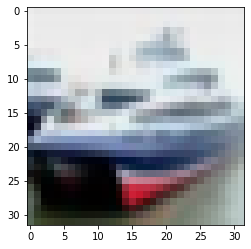

In [8]:
plt.imshow(X_test[1]);

# Build CNN

In [31]:
model = tf.keras.models.Sequential()

Se usa padding para complementar ceros al ejecutar los filtros o el pooling, valid solo se rige el tamanho de la imagen

[Reference](https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow/)

In [32]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))

In [33]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [34]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

In [35]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [36]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [37]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

In [38]:
model.add(tf.keras.layers.Flatten())

In [39]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [40]:
model.add(tf.keras.layers.Dense(units=10, activation="relu"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

## Compiling model

Que es sparse categorical accuracy [AQUI](https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy)

In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

# Training

In [44]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3757 - sparse_categorical_accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000


# Evaluation

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000


In [23]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.10000000149011612


In [24]:
test_loss

2.30259108543396